In [23]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats

import matplotlib as mpl
%matplotlib inline

mpl.rcParams['xtick.labelsize']=18
mpl.rcParams['ytick.labelsize']=18
mpl.rcParams['axes.labelsize']=24
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['patch.linewidth']=3
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.titlesize']=24
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['figure.figsize'] = 10, 8
mpl.rcParams['font.family'] = 'sans-serif'

In [24]:
data_dir = '/home/william/Downloads/sigmaps/data_dir/'

Text(0.5, 1.0, 'Multi-flare Hotspot, Northern Sky')

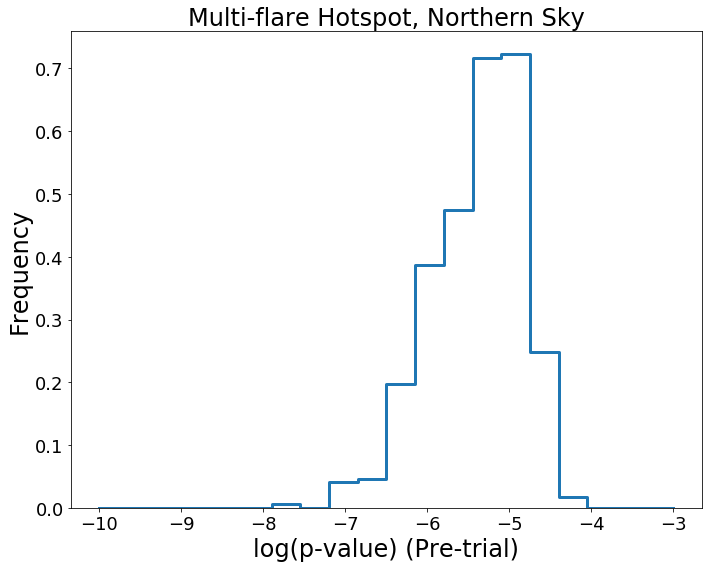

In [115]:
#hotps_mf = np.load('/home/william/Downloads/hotps_mf_north.npy')
hotps_mf = np.load(data_dir+'hotps_mf_north.npy')
loghotps_mf = np.log10(hotps_mf)

phist, pbins = np.histogram(loghotps_mf, bins = np.linspace(-10,-3,21), density=True)
phist = np.concatenate([phist,[0.]])
plt.plot(pbins, phist, drawstyle='steps-post')
plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Multi-flare Hotspot, Northern Sky')

Text(0.5, 1.0, 'Single Flare Hotspot, Northern Sky')

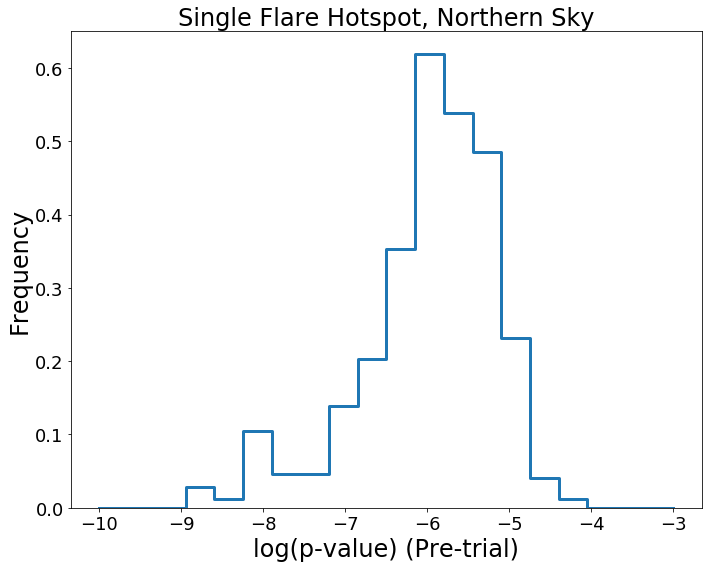

In [13]:
#hotps_sf = np.load('/home/william/Downloads/hotps_sf_north.npy')
hotps_sf = np.load(data_dir+'hotps_sf_north.npy')
loghotps_sf = np.log10(hotps_sf)

phist, pbins = np.histogram(loghotps_sf, bins = np.linspace(-10,-3,21), density=True)
phist = np.concatenate([phist,[0.]])
plt.plot(pbins, phist, drawstyle='steps-post')
plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Single Flare Hotspot, Northern Sky')

Text(0.5, 1.0, 'Multi-Flare Hotspot, Southern Sky')

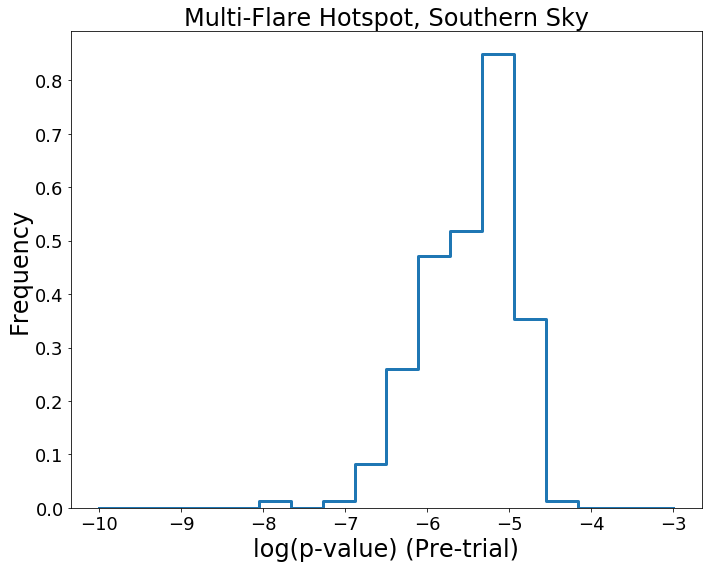

In [14]:
#hotps_sf = np.load('/home/william/Downloads/hotps_mf_south.npy')
hotps_sf = np.load(data_dir+'hotps_mf_south.npy')
loghotps_sf = np.log10(hotps_sf)

phist, pbins = np.histogram(loghotps_sf, bins = np.linspace(-10,-3,19), density=True)
phist = np.concatenate([phist,[0.]])
plt.plot(pbins, phist, drawstyle='steps-post')

plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Multi-Flare Hotspot, Southern Sky')

Text(0.5, 1.0, 'Single Flare Hotspot, Southern Sky')

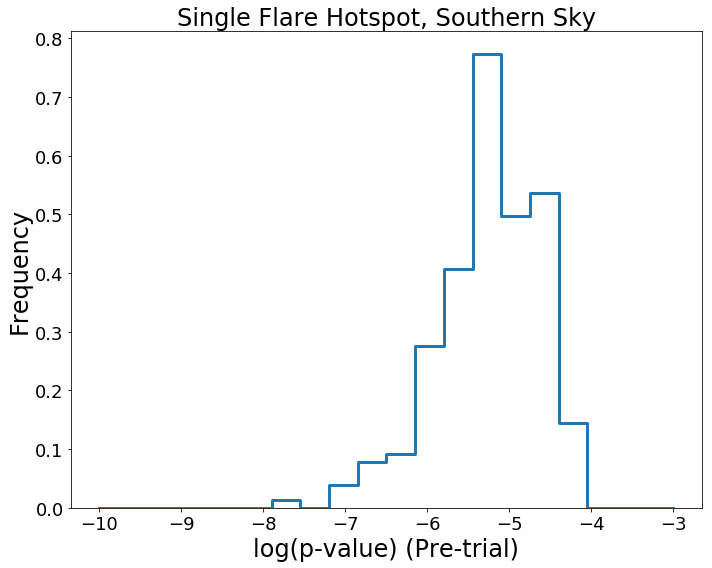

In [15]:
#hotps_sf = np.load('/home/william/Downloads/hotps_sf_south.npy')
hotps_sf = np.load(data_dir+'hotps_sf_south.npy')
loghotps_sf = np.log10(hotps_sf)

phist, pbins = np.histogram(loghotps_sf, bins = np.linspace(-10,-3,21), density=True)
phist = np.concatenate([phist,[0.]])
plt.plot(pbins, phist, drawstyle='steps-post')

plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Single Flare Hotspot, Southern Sky')

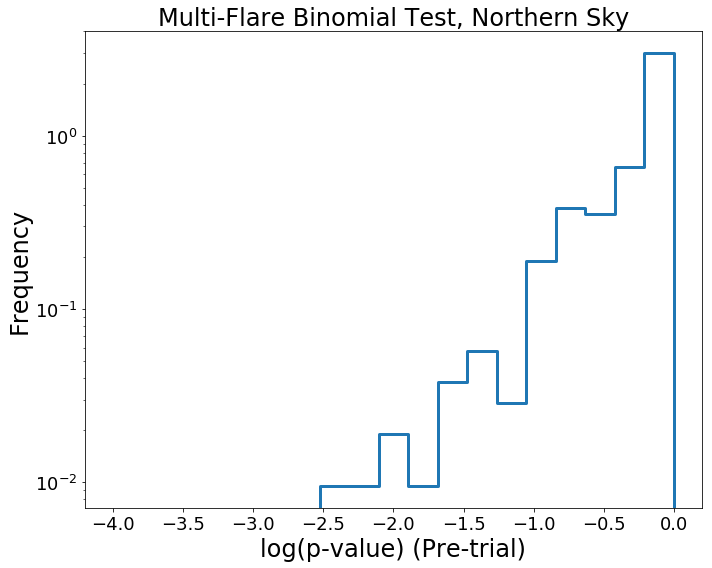

In [25]:
def do_bi_test(ps, factor):
    pcurve = []
    for k in range(1,1000):
        pcurve.append(stats.binom_test(k, 427520*factor, ps[k-1], alternative='greater'))
    return(min(pcurve))

bips = []
for i in range(1,500):
    #print(i)
    try:
        #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/bg/north_hotspots_mf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        hotspot_data = np.load(data_dir+'/bg/north_hotspots_mf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        bip = do_bi_test(hotspot_data['ps_mf'], 1)
        bips.append(bip)
    except FileNotFoundError:
        pass
    
phist, pbins = np.histogram(np.log10(bips), bins = np.linspace(-4,0,20), density=True)
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')

plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Multi-Flare Binomial Test, Northern Sky')

#np.save('/home/william/Downloads/bips_mf_north.npy', bips_mf)
np.save(data_dir+'bips_mf_north.npy', bips)

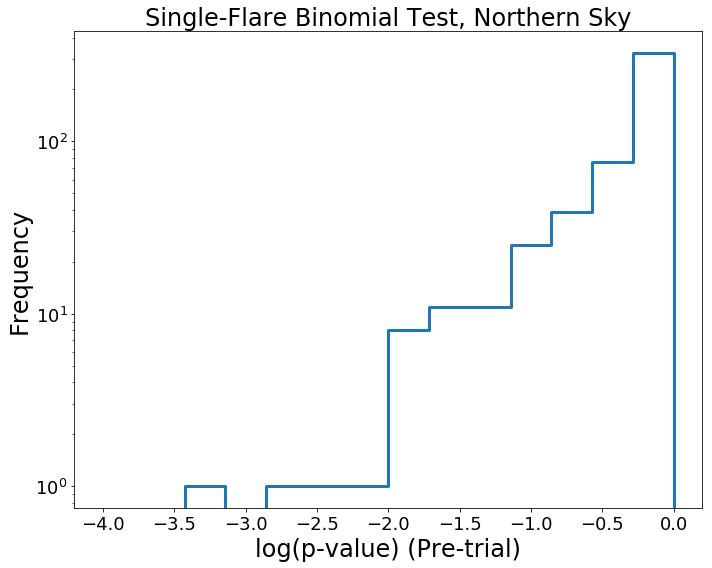

In [26]:
def do_bi_test(ps, factor):
    pcurve = []
    for k in range(1,1000):
        #pcurve.append(stats.binom_test(k, 358912*factor, ps[k-1], alternative='greater'))
        pcurve.append(stats.binom_test(k, 427520*factor, ps[k-1], alternative='greater'))
    return(min(pcurve))

bips = []
for i in range(1,500):
    try:
        #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/bg/north_hotspots_sf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        hotspot_data = np.load(data_dir+'/bg/north_hotspots_sf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        bip = do_bi_test(hotspot_data['ps_sf'], 1)
        bips.append(bip)
    except FileNotFoundError:
        pass
    
phist, pbins = np.histogram(np.log10(bips), bins = np.linspace(-4,0,15))
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')

plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Single-Flare Binomial Test, Northern Sky')

#np.save('/home/william/Downloads/bips_sf_north.npy', bips_sf)
np.save(data_dir+'bips_sf_north.npy', bips)

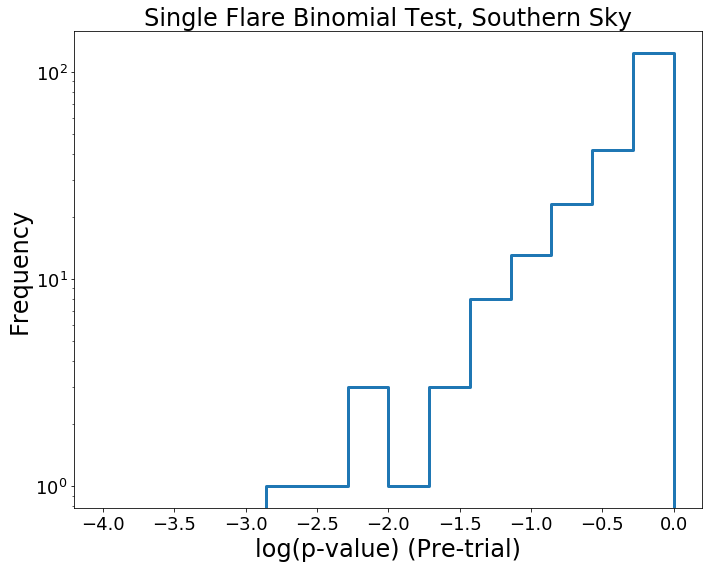

In [27]:
def do_bi_test(ps, factor):
    pcurve = []
    for k in range(1,1000):
        pcurve.append(stats.binom_test(k, 358912*factor, ps[k-1], alternative='greater'))
    return(min(pcurve))

bips = []
for i in range(1,500):
    try:
        #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/bg/south_hotspots_sf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        hotspot_data = np.load(data_dir+'/bg/south_hotspots_sf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        bip = do_bi_test(hotspot_data['ps_sf'], 1)
        bips.append(bip)
    except FileNotFoundError:
        pass
    
phist, pbins = np.histogram(np.log10(bips), bins = np.linspace(-4,0,15))
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')
plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Single Flare Binomial Test, Southern Sky')
np.save(data_dir+'bips_sf_south.npy', bips)

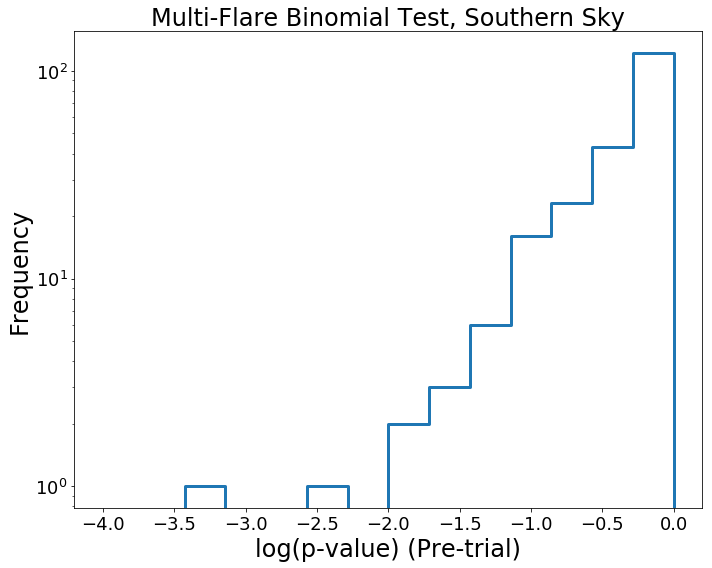

In [28]:
def do_bi_test(ps, factor):
    pcurve = []
    for k in range(1,1000):
        pcurve.append(stats.binom_test(k, 358912*factor, ps[k-1], alternative='greater'))
    return(min(pcurve))

bips = []
for i in range(1,500):
    try:
        #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/bg/south_hotspots_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        hotspot_data = np.load(data_dir+'/bg/south_hotspots_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        bip = do_bi_test(hotspot_data['ps_mf'], 1)
        bips.append(bip)
    except FileNotFoundError:
        pass
    
phist, pbins = np.histogram(np.log10(bips), bins = np.linspace(-4,0,15))
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')

plt.xlabel('log(p-value) (Pre-trial)')
plt.ylabel('Frequency')
plt.ylim(0,)
plt.title('Multi-Flare Binomial Test, Southern Sky')

np.save(data_dir+'bips_mf_south.npy', bips)

0.94


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'N')

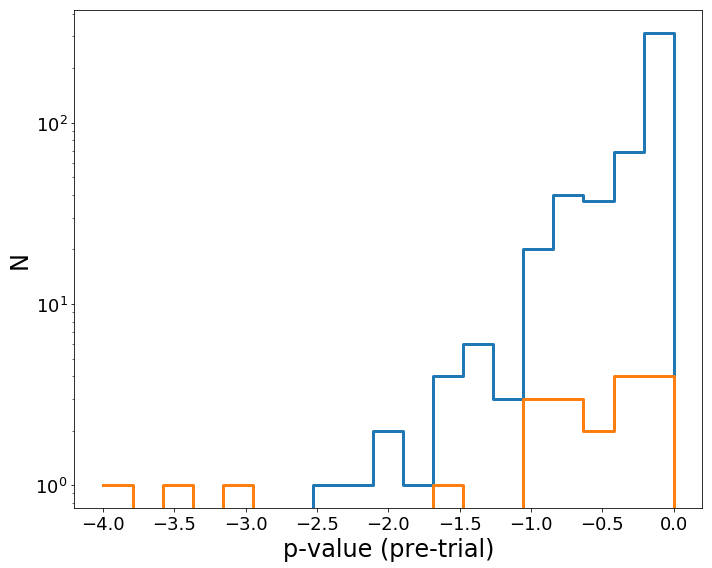

In [22]:
rho = '1e-7'
Nflare = 1

bips = np.load(data_dir+'bips_mf_north.npy')

bips_sig = []
for i in range(0,50):
    try:
        #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/sig/1e-7/1flare/north_hotspots_mf_%s.npy'%(i), allow_pickle=True, encoding='bytes')
        hotspot_data = np.load(data_dir+'/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
        bip = do_bi_test(hotspot_data['ps_mf'], 1)
        bips_sig.append(bip)
    except FileNotFoundError:
        pass        

phist, pbins = np.histogram(np.log10(bips), bins = np.linspace(-4,0,20))
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')    
    
phist, pbins = np.histogram(np.log10(bips_sig), bins = np.linspace(-4,0,20))
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')
    
thresh = np.median(bips)
bips_sig = np.array(bips_sig)
print(len(bips_sig[bips_sig<thresh])/float(len(bips_sig)))

plt.xlabel('p-value (pre-trial)')
plt.ylabel('N')

0.92


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'N')

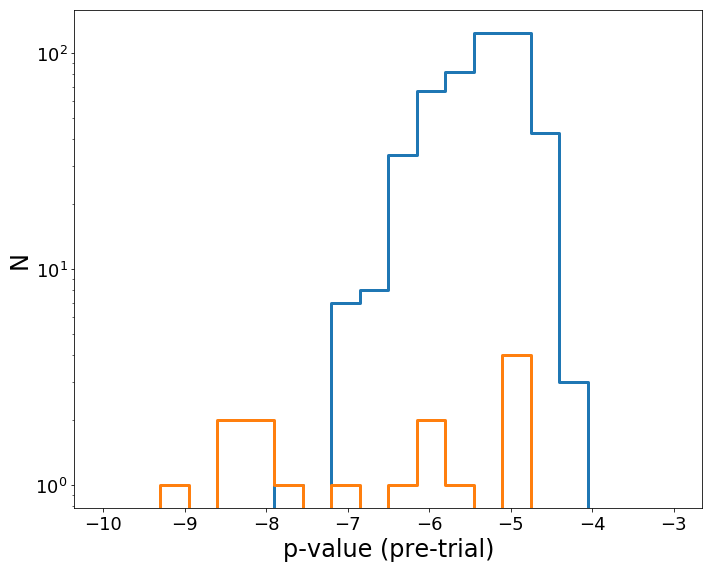

In [23]:
hotps_mf = np.load(data_dir+'hotps_mf_north.npy')
loghotps_mf = np.log10(hotps_mf)
thresh = np.median(hotps_mf)

phist, pbins = np.histogram(loghotps_mf, bins = np.linspace(-10,-3,21))
phist = np.concatenate([phist,[0.]])
plt.plot(pbins, phist, drawstyle='steps-post')

rho = '1e-7'
Nflare = 1
hotps_sig = []
for i in range(0,50):
    try:
        #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
        hotspot_data = np.load(data_dir+'/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
        hotp = min(hotspot_data['ps_sf'])
        hotps_sig.append(hotp)
    except FileNotFoundError:
        pass        
        
hotps_sig = np.array(hotps_sig)
phist, pbins = np.histogram(np.log10(hotps_sig), bins = np.linspace(-10,-3,21))
phist = np.concatenate([phist, [0.]])
plt.semilogy(pbins, phist, drawstyle='steps-post')
    
print(len(hotps_sig[hotps_sig<thresh])/float(len(hotps_sig)))

plt.xlabel('p-value (pre-trial)')
plt.ylabel('N')

(1e-07, 1e-06)

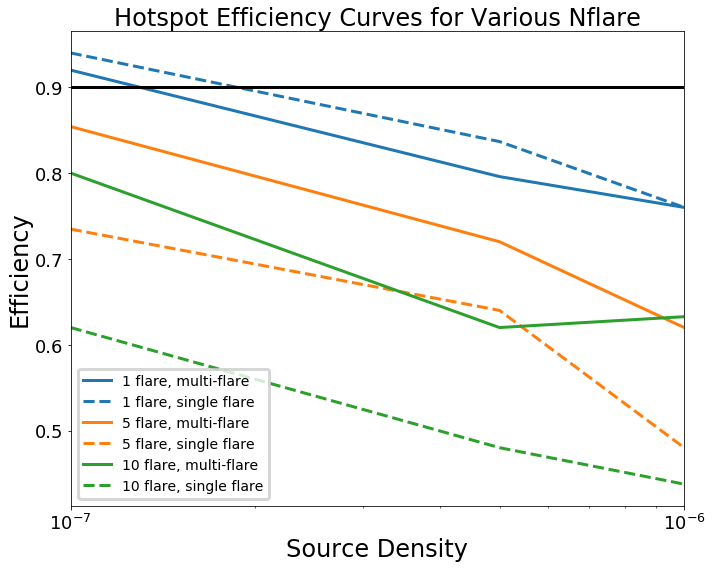

In [189]:
hotps_mf = np.load(data_dir+'hotps_mf_north.npy')
loghotps_mf = np.log10(hotps_mf)
thresh_mf = np.median(hotps_mf)

hotps_sf = np.load(data_dir+'/hotps_mf_north.npy')
loghotps_mf = np.log10(hotps_sf)
thresh_sf = np.median(hotps_sf)

def get_sig_eff_mf(rho, Nflare, thresh):
    hotps_sig = []
    for i in range(0,50):
        try:
            #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            hotspot_data = np.load(data_dir+'/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            hotp = min(hotspot_data['ps_mf'])
            hotps_sig.append(hotp)
        except FileNotFoundError:
            pass        
    hotps_sig = np.array(hotps_sig)
    return len(hotps_sig[hotps_sig<thresh])/float(len(hotps_sig))

def get_sig_eff_sf(rho, Nflare, thresh):
    hotps_sig = []
    for i in range(0,50):
        try:
            #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/sig/%s/%sflare/north_hotspots_sf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            hotspot_data = np.load(data_dir+'/sig/%s/%sflare/north_hotspots_sf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            hotp = min(hotspot_data['ps_sf'])
            hotps_sig.append(hotp)
        except FileNotFoundError:
            pass        
    hotps_sig = np.array(hotps_sig)
    return len(hotps_sig[hotps_sig<thresh])/float(len(hotps_sig))
    

colors = ['tab:blue', 'tab:orange', 'tab:green']
i = 0
for Nflare in [1,5,10]:
    rhos = ['1e-7', '5e-7', '1e-6']
    effs_mf = []
    effs_sf = []
    pltrhos = []
    for rho in rhos:
        pltrhos.append(float(rho))
        eff_mf = get_sig_eff_mf(rho, Nflare, thresh_mf)
        effs_mf.append(eff_mf)
        eff_sf = get_sig_eff_sf(rho, Nflare, thresh_sf)
        effs_sf.append(eff_sf)

    plt.semilogx(pltrhos, effs_mf, linestyle='-', color=colors[i], label='%s flare, multi-flare'%(Nflare))
    plt.semilogx(pltrhos, effs_sf, linestyle='--', color=colors[i], label='%s flare, single flare'%(Nflare))
    
    #np.savez('/home/william/Downloads/sigmaps/effcurve_hotspot_mf_%s.npz'%(Nflare), pltrhos, effs_mf)
    #np.savez('/home/william/Downloads/sigmaps/effcurve_hotspot_sf_%s.npz'%(Nflare), pltrhos, effs_sf)
    np.savez(data_dir+'effcurve_hotspot_mf_%s.npz'%(Nflare), pltrhos, effs_mf)
    np.savez(data_dir+'effcurve_hotspot_sf_%s.npz'%(Nflare), pltrhos, effs_sf)
    i+=1
    
plt.axhline(0.9, color='k')
plt.xlabel('Source Density')
plt.ylabel('Efficiency')
plt.title('Hotspot Efficiency Curves for Various Nflare')
plt.legend(loc=0)
plt.xlim(1e-7, 1e-6)

(1e-07, 1e-06)

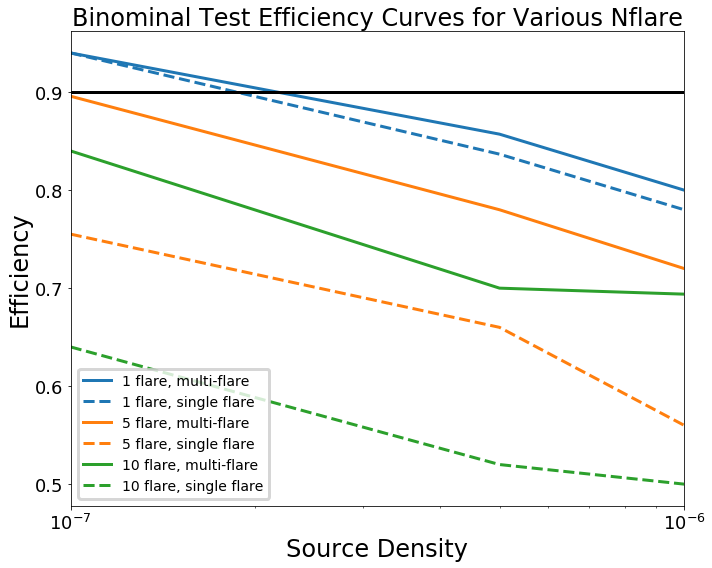

In [134]:
bips_mf = np.load(data_dir+'bips_mf_north.npy')
bips_sf = np.load(data_dir+'bips_sf_north.npy')
thresh_mf = np.median(bips_mf)
thresh_sf = np.median(bips_sf)

def get_sig_eff_mf(rho, Nflare, thresh):
    bips_sig = []
    for i in range(0,50):
        try:
            #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            hotspot_data = np.load(data_dir+'/sig/%s/%sflare/north_hotspots_mf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            bip = do_bi_test(hotspot_data['ps_mf'], 1)
            bips_sig.append(bip)
        except FileNotFoundError:
            pass        
    bips_sig = np.array(bips_sig)
    return len(bips_sig[bips_sig<thresh])/float(len(bips_sig))
    
def get_sig_eff_sf(rho, Nflare, thresh):
    bips_sig = []
    for i in range(0,50):
        try:
            #hotspot_data = np.load('/home/william/Downloads/sigmaps/mf/sig/%s/%sflare/north_hotspots_sf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            hotspot_data = np.load(data_dir+'/sig/%s/%sflare/north_hotspots_sf_%s.npy'%(rho, Nflare, i), allow_pickle=True, encoding='bytes')
            bip = do_bi_test(hotspot_data['ps_sf'], 1)
            bips_sig.append(bip)
        except FileNotFoundError:
            pass        
    bips_sig = np.array(bips_sig)
    return len(bips_sig[bips_sig<thresh])/float(len(bips_sig))

colors = ['tab:blue', 'tab:orange', 'tab:green']
i=0
for Nflare in [1,5,10]:
    rhos = ['1e-7', '5e-7', '1e-6']
    effs_mf = []
    effs_sf = []
    pltrhos = []
    for rho in rhos:
        pltrhos.append(float(rho))
        eff_mf = get_sig_eff_mf(rho, Nflare, thresh_mf)
        eff_sf = get_sig_eff_sf(rho, Nflare, thresh_sf)
        effs_mf.append(eff_mf)
        effs_sf.append(eff_sf)

    plt.semilogx(pltrhos, effs_mf, linestyle='-', color=colors[i], label='%s flare, multi-flare'%(Nflare))
    plt.semilogx(pltrhos, effs_sf, linestyle='--', color=colors[i], label='%s flare, single flare'%(Nflare))

    np.savez(data_dir+'effcurve_bi_mf_%s.npz'%(Nflare), pltrhos, effs_mf)
    np.savez(data_dir+'effcurve_bi_sf_%s.npz'%(Nflare), pltrhos, effs_sf)
    i+=1
    
plt.axhline(0.9, color='k')
plt.xlabel('Source Density')
plt.ylabel('Efficiency')
plt.title('Binominal Test Efficiency Curves for Various Nflare')
plt.legend(loc=0)
plt.xlim(1e-7, 1e-6)

In [182]:
from scipy import stats

def sens_curve(xvals, yvals, c, lab):
    logx = np.log10(xvals)
    logy = np.log10(yvals)
    linefit = stats.linregress(logx, logy)
    m = linefit[0]
    b = linefit[1]
    xplot = np.logspace(-12,-4,100)
    logyplot = m*np.log10(xplot)+b
    yplot = 10.**logyplot
    plt.fill_between(xplot,yplot,0, color=c, alpha=0.2, label=lab)
    
def sens_calc(pltrhos, effs_mf):
    pltrhos = np.log10(pltrhos)
    linefit = stats.linregress(pltrhos, effs_mf)
    m = linefit[0]
    b = linefit[1]
    sens = (0.9-b)/m
    return 10.**sens

def sens_curve_line(xvals, yvals, c, ls, lab):
    print("plotting")
    logx = np.log10(xvals)
    logy = np.log10(yvals)
    linefit = stats.linregress(logx, logy)
    m = linefit[0]
    b = linefit[1]
    xplot = np.logspace(-12,-4,100)
    logyplot = m*np.log10(xplot)+b
    yplot = 10.**logyplot
    #plt.plot([0,1], [0,1], color=c, linestyle=ls, label=lab)
    plt.plot(xplot, yplot, color=c, linestyle=ls, label=lab)
    #plt.fill_between(xplot,yplot,0, color=c, alpha=0.2, label=lab)


plotting
plotting


Text(0, 0.5, 'Flares per 10 years')

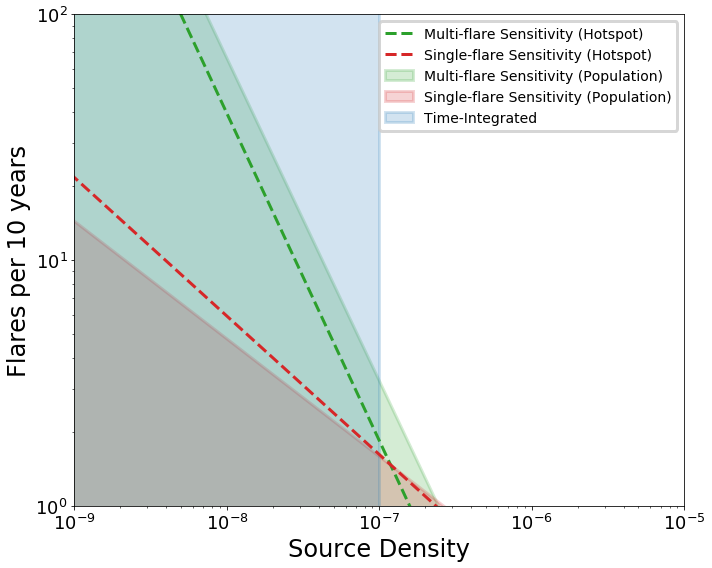

In [190]:
Nflares = [1,5,10]
sens_hotspot_mfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_hotspot_mf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_hotspot_mfs.append(sens_calc(effx, effy))
    
#plt.semilogx(sens_hotspot_mfs, Nflares, 'x', color='tab:green')

Nflares = [1,5,10]
sens_bi_mfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_bi_mf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_bi_mfs.append(sens_calc(effx, effy))

sens_curve_line(sens_hotspot_mfs, Nflares, 'tab:green', '--', 'Multi-flare Sensitivity (Hotspot)')

#plt.semilogx(sens_hotspot_mfs, Nflares, 'x', color='tab:green')
sens_curve(sens_bi_mfs, Nflares, 'tab:green', 'Multi-flare Sensitivity (Population)')


Nflares = [1,5,10]
sens_hotspot_sfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_hotspot_sf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_hotspot_sfs.append(sens_calc(effx, effy))
    
#plt.semilogx(sens_hotspot_sfs, Nflares, 'x', color='tab:red')


Nflares = [1,5,10]
sens_bi_sfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_bi_sf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_bi_sfs.append(sens_calc(effx, effy))

sens_curve(sens_bi_sfs, Nflares, 'tab:red', 'Single-flare Sensitivity (Population)')
sens_curve_line(sens_hotspot_sfs, Nflares, 'tab:red', '--', 'Single-flare Sensitivity (Hotspot)')

#plt.axvline(1e-7, color='tab:blue', linestyle='--')
plt.fill_between([1e-12, 1e-7], [120,120], 0, color='tab:blue', alpha=0.2, label='Time-Integrated')


plt.xlim(1e-9, 1e-5)
plt.ylim(1,100)
plt.loglog()
plt.legend(loc=1)
plt.xlabel('Source Density')
plt.ylabel('Flares per 10 years')

Text(0, 0.5, 'Flares per 10 years')

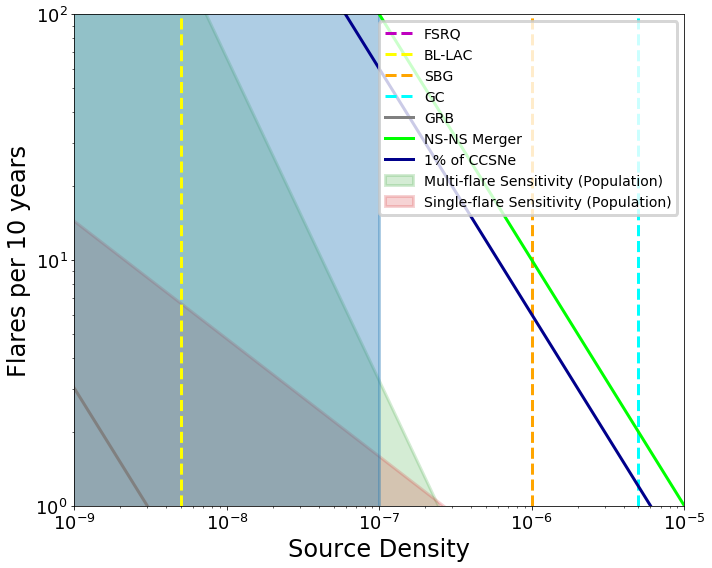

In [187]:
Nflares = [1,5,10]
sens_hotspot_mfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_hotspot_mf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_hotspot_mfs.append(sens_calc(effx, effy))
    
#plt.semilogx(sens_hotspot_mfs, Nflares, 'x', color='tab:green')

Nflares = [1,5,10]
sens_bi_mfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_bi_mf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_bi_mfs.append(sens_calc(effx, effy))

#sens_curve_line(sens_hotspot_mfs, Nflares, 'tab:green', '--', 'Multi-flare Sensitivity (Hotspot)')

#plt.semilogx(sens_hotspot_mfs, Nflares, 'x', color='tab:green')
sens_curve(sens_bi_mfs, Nflares, 'tab:green', 'Multi-flare Sensitivity (Population)')


Nflares = [1,5,10]
sens_hotspot_sfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_hotspot_sf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_hotspot_sfs.append(sens_calc(effx, effy))
    
#plt.semilogx(sens_hotspot_sfs, Nflares, 'x', color='tab:red')


Nflares = [1,5,10]
sens_bi_sfs = []
for Nflare in Nflares:
    effcurve_mf = np.load(data_dir+'effcurve_bi_sf_%s.npz'%(Nflare))
    effx = effcurve_mf['arr_0']
    effy = effcurve_mf['arr_1']
    sens_bi_sfs.append(sens_calc(effx, effy))

sens_curve(sens_bi_sfs, Nflares, 'tab:red', 'Single-flare Sensitivity (Population)')
#sens_curve_line(sens_hotspot_sfs, Nflares, 'tab:red', '--', 'Single-flare Sensitivity (Hotspot)')

#plt.axvline(1e-7, color='tab:blue', linestyle='--')
plt.fill_between([1e-12, 1e-7], [120,120], 0, color='tab:blue', alpha=0.2)


plt.xlim(1e-9, 1e-5)
plt.ylim(1,100)
plt.loglog()
plt.legend(loc=1)
plt.xlabel('Source Density')
plt.ylabel('Flares per 10 years')
plt.fill_between([1e-12, 1e-7], [120,120], 0, color='tab:blue', alpha=0.2)

plt.axvline(2e-12, color='m', linestyle='--', label='FSRQ')
plt.axvline(5e-9, color='yellow', linestyle='--', label='BL-LAC')
plt.axvline(1e-6, color='orange', linestyle='--', label='SBG')
plt.axvline(5e-6, color='cyan', linestyle='--', label='GC')

xvals = np.logspace(-12, -5, 100)
yvals = 3e-9/xvals
plt.plot(xvals, yvals, color='gray',linestyle='-', label='GRB')

NSNS_yvals = 1e-5/xvals
plt.plot(xvals, NSNS_yvals, color='lime', linestyle='-', label='NS-NS Merger')

SN_yvals = 6e-6/xvals
plt.plot(xvals, SN_yvals, color='darkblue', linestyle='-', label='1% of CCSNe')

plt.xlim(1e-9, 1e-5)
plt.ylim(1,100)
plt.loglog()
plt.legend(loc=1)
plt.xlabel('Source Density')
plt.ylabel('Flares per 10 years')

5.802264023437175
6.165250018536603
10.210419880657481
19.548722329918718
29.094680688330094
38.46301914210548


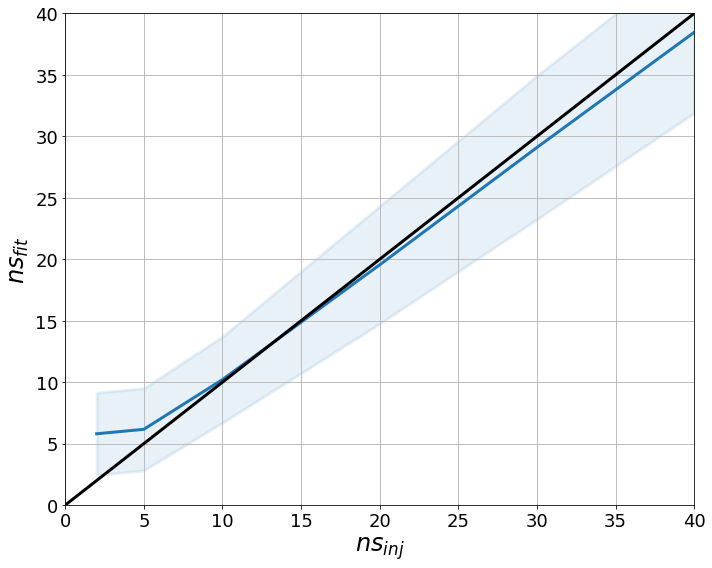

In [29]:
nss = [2.0, 5.0, 10.0, 20.0, 30.0, 40.0]
davgs = []
dstds = []
for ns in nss:
    data = np.load(data_dir+'/ns_recovery/%s_evts.npz'%(ns), allow_pickle=True, encoding='bytes')
    dmaxes = []
    for d in data['arr_0']:
        dmaxes.append(d[0])
    print(np.median(dmaxes))
    davgs.append(np.median(dmaxes))
    dstds.append(np.std(dmaxes))

davgs = np.array(davgs)
dstds = np.array(dstds)
    
plt.plot(nss, davgs, '-', color='tab:blue')
plt.fill_between(nss, davgs+dstds, davgs-dstds, alpha=0.1, color='tab:blue')
plt.plot([0,40], [0,40], 'k-')
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel('$ns_{inj}$')
plt.ylabel('$ns_{fit}$')
plt.grid()   

[0.70322727 0.61866044 0.44885732 0.25592721 0.28245385 0.24279183]
[0.68643264 0.64501942 0.56608832 0.46202199 0.38854448 0.33543794]


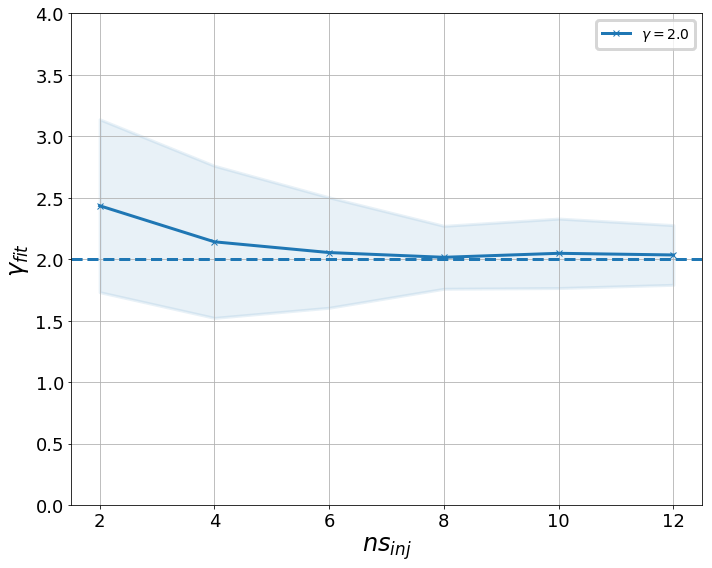

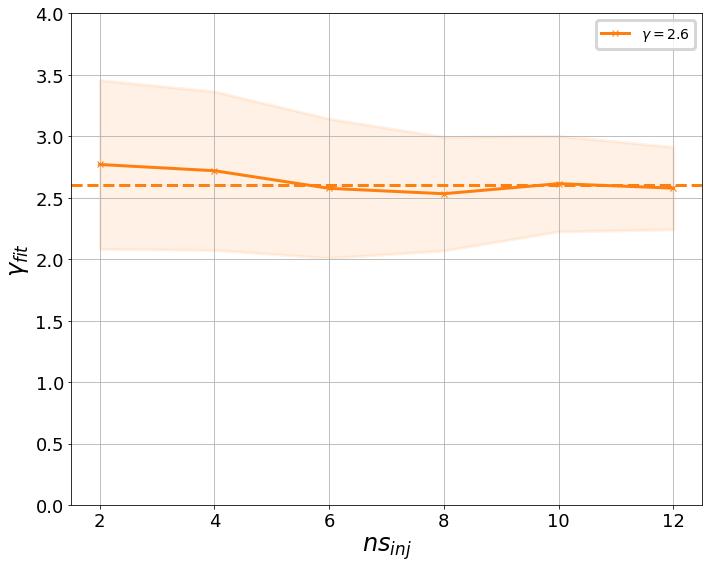

In [30]:
cs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
i=0
for gamma in [2.0, 2.6]:
    plt.figure(i)
    nsgams = []
    nserrs = []
    nss = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
    for nevts in nss:
        data = np.load(data_dir+'/ns_recovery/%s_evts_%sgamma.npz'%(nevts, gamma), encoding='bytes')
        gamlists = data['arr_1']
        max_gams = [g[0] for g in gamlists]
        nsgams.append(np.median(max_gams))
        nserrs.append(np.std(max_gams))
    nsgams = np.array(nsgams)
    nserrs = np.array(nserrs)
    print(nserrs)
    plt.plot(nss, nsgams, color=cs[i], marker='x', label='$\gamma=$%s'%(gamma))
    plt.fill_between(nss, nsgams+nserrs, nsgams-nserrs, alpha=0.1, color=cs[i])
    #plt.errorbar(np.arange(-75, 55, 10), decgams, yerr=decerrs, color=cs[i])
    plt.axhline(gamma, color=cs[i], linestyle='--')
    i+=1

    plt.ylim(0,4)
    plt.legend(loc=0)
    plt.xlabel('$ns_{inj}$')
    plt.ylabel('$\gamma_{fit}$')

    plt.grid()   

## Chi2 Fits for Declination Bins

4300800


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


4300800
4096000
4300800
4300800
4300800
4300800
4096000
4300800
4300800
4300800
4300800
4096000
4300000
4285600
4233600
4356800
4211200
4284000


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4234400


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

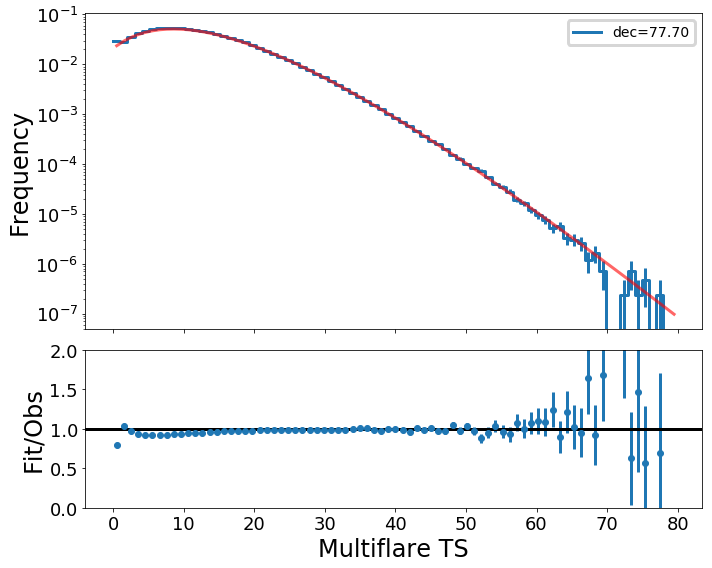

In [38]:
import csky as cy
import histlite as hl
from scipy.stats import chi2
from scipy.optimize import curve_fit

absmin = np.sin(np.radians(-5.))
absmax = np.sin(np.radians(85.))
sindecbands = []
for decband in range(0,20):
    minsindec = absmin+((absmax-absmin)/20.)*decband
    maxsindec = absmin+((absmax-absmin)/20.)*(decband+1)
    sindecbands.append(minsindec)

sindecbands.append(np.sin(np.radians(85.)))

declist = [-5., 0., 5., 10., 15., 20., 25., 30., 35., 40.,  45., 50.,  55., 60.,  65., 70., 75., 80., 85.]
chi2fits = {}

for ind in range(0,20):
    plt.clf()
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    dec = (np.degrees(np.arcsin(sindecbands[ind]))+np.degrees(np.arcsin(sindecbands[ind+1])))/2.
    bg_ts = np.load(data_dir+'/sindecbands/mf_%s.npy'%(float(ind)))
    print(len(bg_ts))
    if ind == 10:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,70,140), density=True)
    else:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,60,120), density=True)
    fitbins = fitbins[:-1]
    fitbin_centers = fitbins+(fitbins[1]-fitbins[0])*0.5

    
    hist, bins = np.histogram(bg_ts, bins = np.linspace(0,80,80), density=True)
    errhist, errbins = np.histogram(bg_ts, bins = np.linspace(0,80,80))
    normed_errhist = errhist/sum(errhist)
    bins = bins[:-1]
    ax1.plot(bins, hist, drawstyle='steps-post', label='dec=%.2f'%(dec))
    bin_centers = bins+(bins[1]-bins[0])*0.5
    err = np.sqrt(errhist)/sum(errhist)    
    ax1.errorbar(bin_centers, normed_errhist, yerr=err, linestyle='None', color='tab:blue')    
    ax1.set_yscale('log')
    ax1.set_ylabel('Frequency')
    ax1.legend(loc=0)
    
    
    fit_x = fitbin_centers[fithist>0.]
    fit_y = np.log10(fithist[fithist>0.])


    def f(x, ndof, loc, scale):
        return np.log10(stats.chi2.pdf(x, ndof, loc, scale))
        
    # fit chi2.pdf to normalized hist of positive TS
    #f = lambda x, ndof, loc, scale: np.log10(stats.chi2.pdf(x, ndof, loc, scale))
    params, cov = curve_fit(f, fit_x, fit_y, p0=(9.64553646, -5.73856309,  1.74778147))
    chi2fits[ind+1]=params

    ax1.plot(bin_centers, chi2.pdf(bin_centers,params[0], params[1], params[2]),'r-', alpha=0.6, label='chi2 pdf')

    pull = chi2.pdf(bin_centers,params[0], params[1], params[2])/hist
    pullerr = err/hist
    ax2.errorbar(bin_centers, pull, yerr=pullerr, linestyle='None', marker='o')
    
    ax2.axhline(1, color='k')
    ax2.set_ylim(0,2)
    ax2.set_ylabel('Fit/Obs')
    ax2.set_xlabel('Multiflare TS')
    
#plt.legend(loc=0)

    plt.savefig(data_dir+'/sindecbands/sindec_%s.png'%(ind))

2164932


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


2161060
2199780
2165900
2156220
2163480
2112660
2225432
2106368
2106368
2230272
2106368
2230272
2106368
2230272
2106368
2230272
2106368
2230272
2106368


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

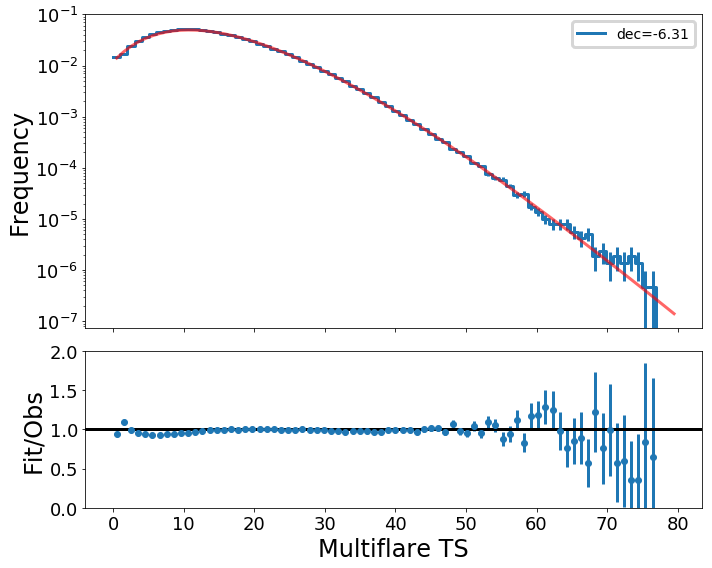

In [39]:
import csky as cy
import histlite as hl
from scipy.stats import chi2
from scipy.optimize import curve_fit

absmin = np.sin(np.radians(-85.))
absmax = np.sin(np.radians(-5.))
sindecbands = []
for decband in range(0,20):
    minsindec = absmin+((absmax-absmin)/20.)*decband
    maxsindec = absmin+((absmax-absmin)/20.)*(decband+1)
    sindecbands.append(minsindec)

sindecbands.append(np.sin(np.radians(-5.)))

declist = [-5., 0., 5., 10., 15., 20., 25., 30., 35., 40.,  45., 50.,  55., 60.,  65., 70., 75., 80., 85.]
chi2fits = {}

for ind in range(0,20):
    plt.clf()
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    dec = (np.degrees(np.arcsin(sindecbands[ind]))+np.degrees(np.arcsin(sindecbands[ind+1])))/2.
    bg_ts = np.load(data_dir+'/sindecbands/south_mf_%s.npy'%(float(ind)))
    print(len(bg_ts))
    if ind == 10:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,70,140), density=True)
    else:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,60,120), density=True)
    fitbins = fitbins[:-1]
    fitbin_centers = fitbins+(fitbins[1]-fitbins[0])*0.5

    
    hist, bins = np.histogram(bg_ts, bins = np.linspace(0,80,80), density=True)
    errhist, errbins = np.histogram(bg_ts, bins = np.linspace(0,80,80))
    normed_errhist = errhist/sum(errhist)
    bins = bins[:-1]
    ax1.plot(bins, hist, drawstyle='steps-post', label='dec=%.2f'%(dec))
    bin_centers = bins+(bins[1]-bins[0])*0.5
    err = np.sqrt(errhist)/sum(errhist)    
    ax1.errorbar(bin_centers, normed_errhist, yerr=err, linestyle='None', color='tab:blue')    
    ax1.set_yscale('log')
    ax1.set_ylabel('Frequency')
    ax1.legend(loc=0)
    
    
    fit_x = fitbin_centers[fithist>0.]
    fit_y = np.log10(fithist[fithist>0.])


    def f(x, ndof, loc, scale):
        return np.log10(stats.chi2.pdf(x, ndof, loc, scale))
        
    # fit chi2.pdf to normalized hist of positive TS
    #f = lambda x, ndof, loc, scale: np.log10(stats.chi2.pdf(x, ndof, loc, scale))
    params, cov = curve_fit(f, fit_x, fit_y, p0=(9.64553646, -5.73856309,  1.74778147))
    chi2fits[ind+1]=params

    ax1.plot(bin_centers, chi2.pdf(bin_centers,params[0], params[1], params[2]),'r-', alpha=0.6, label='chi2 pdf')

    pull = chi2.pdf(bin_centers,params[0], params[1], params[2])/hist
    pullerr = err/hist
    ax2.errorbar(bin_centers, pull, yerr=pullerr, linestyle='None', marker='o')
    
    ax2.axhline(1, color='k')
    ax2.set_ylim(0,2)
    ax2.set_ylabel('Fit/Obs')
    ax2.set_xlabel('Multiflare TS')
    
#plt.legend(loc=0)

    plt.savefig(data_dir+'sindecbands/sindec_%s_south.png'%(ind))

4288851


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10


4293204
4085796
4291367
4291446
4290137
4292729
4087896
4291071
4293588
4292371
4292759
4086739
4291944
4277170
4225103
4347984
4200922
4277789
4197457


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

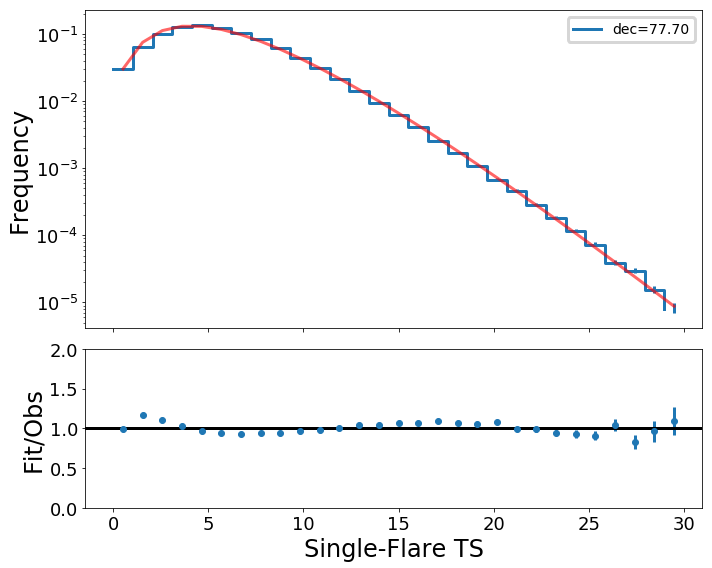

In [41]:
import csky as cy
import histlite as hl
from scipy.stats import chi2
from scipy.optimize import curve_fit

absmin = np.sin(np.radians(-5.))
absmax = np.sin(np.radians(85.))
sindecbands = []
for decband in range(0,20):
    minsindec = absmin+((absmax-absmin)/20.)*decband
    maxsindec = absmin+((absmax-absmin)/20.)*(decband+1)
    sindecbands.append(minsindec)

sindecbands.append(np.sin(np.radians(85.)))

declist = [-5., 0., 5., 10., 15., 20., 25., 30., 35., 40.,  45., 50.,  55., 60.,  65., 70., 75., 80., 85.]
chi2fits = {}

for ind in range(0,20):
    plt.clf()
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    dec = (np.degrees(np.arcsin(sindecbands[ind]))+np.degrees(np.arcsin(sindecbands[ind+1])))/2.
    bg_ts = np.load(data_dir+'/sindecbands/%s.npy'%(float(ind)))
    bg_ts = bg_ts
    print(len(bg_ts))
    if ind == 10:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,30,60), density=True)
    else:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,30,60), density=True)
    fitbins = fitbins[:-1]
    fitbin_centers = fitbins+(fitbins[1]-fitbins[0])*0.5

    
    hist, bins = np.histogram(bg_ts, bins = np.linspace(0,30,30), density=True)
    errhist, errbins = np.histogram(bg_ts, bins = np.linspace(0,30,30))
    normed_errhist = errhist/sum(errhist)
    bins = bins[:-1]
    ax1.plot(bins, hist, drawstyle='steps-post', label='dec=%.2f'%(dec))
    bin_centers = bins+(bins[1]-bins[0])*0.5
    err = np.sqrt(errhist)/sum(errhist)    
    ax1.errorbar(bin_centers, normed_errhist, yerr=err, linestyle='None', color='tab:blue')    
    ax1.set_yscale('log')
    ax1.set_ylabel('Frequency')
    ax1.legend(loc=0)
    
    
    fit_x = fitbin_centers[fithist>0.]
    fit_y = np.log10(fithist[fithist>0.])


    def f(x, ndof, loc, scale):
        return np.log10(stats.chi2.pdf(x, ndof, loc, scale))
        
    # fit chi2.pdf to normalized hist of positive TS
    #f = lambda x, ndof, loc, scale: np.log10(stats.chi2.pdf(x, ndof, loc, scale))
    params, cov = curve_fit(f, fit_x, fit_y, p0=(9.64553646, -5.73856309,  1.74778147))
    chi2fits[ind+1]=params

    ax1.plot(bin_centers, chi2.pdf(bin_centers,params[0], params[1], params[2]),'r-', alpha=0.6, label='chi2 pdf')

    pull = chi2.pdf(bin_centers,params[0], params[1], params[2])/hist
    pullerr = err/hist
    ax2.errorbar(bin_centers, pull, yerr=pullerr, linestyle='None', marker='o')
    
    ax2.axhline(1, color='k')
    ax2.set_ylim(0,2)
    ax2.set_ylabel('Fit/Obs')
    ax2.set_xlabel('Single-Flare TS')
    
#plt.legend(loc=0)

    plt.savefig(data_dir+'/sindecbands/sf_sindec_%s.png'%(ind))

2129683
2140419
2178287
2143930


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10


2133182
2140629
2090362
2202235
2088361
2088667
2217669
2091926
2212028
2086181
2203657
2082573
2193956
2070379
2199099
2097920


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

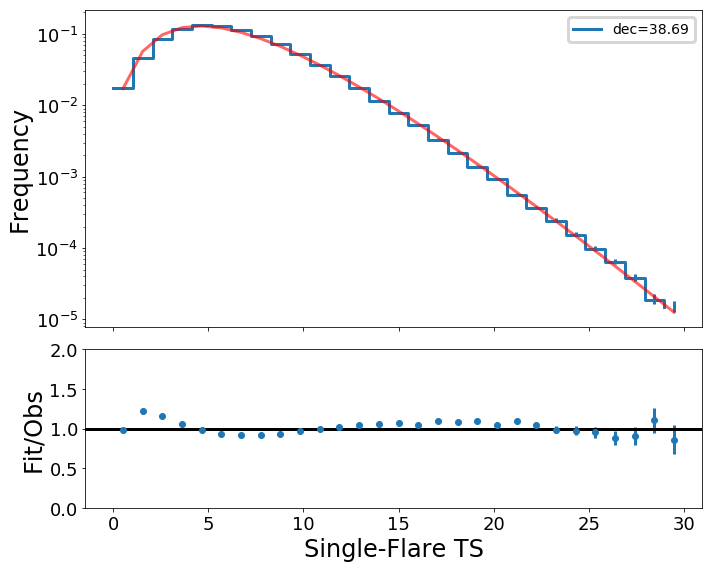

In [42]:
import csky as cy
import histlite as hl
from scipy.stats import chi2
from scipy.optimize import curve_fit

absmin = np.sin(np.radians(-85.))
absmax = np.sin(np.radians(-5.))
sindecbands = []
for decband in range(0,20):
    minsindec = absmin+((absmax-absmin)/20.)*decband
    maxsindec = absmin+((absmax-absmin)/20.)*(decband+1)
    sindecbands.append(minsindec)

sindecbands.append(np.sin(np.radians(85.)))

declist = [-5., 0., 5., 10., 15., 20., 25., 30., 35., 40.,  45., 50.,  55., 60.,  65., 70., 75., 80., 85.]
chi2fits = {}

for ind in range(0,20):
    plt.clf()
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    dec = (np.degrees(np.arcsin(sindecbands[ind]))+np.degrees(np.arcsin(sindecbands[ind+1])))/2.
    bg_ts = np.load(data_dir+'/sindecbands/south_%s.npy'%(float(ind)))
    bg_ts = bg_ts
    print(len(bg_ts))
    if ind == 10:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,30,60), density=True)
    else:
        fithist, fitbins = np.histogram(bg_ts, bins = np.linspace(0,30,60), density=True)
    fitbins = fitbins[:-1]
    fitbin_centers = fitbins+(fitbins[1]-fitbins[0])*0.5

    
    hist, bins = np.histogram(bg_ts, bins = np.linspace(0,30,30), density=True)
    errhist, errbins = np.histogram(bg_ts, bins = np.linspace(0,30,30))
    normed_errhist = errhist/sum(errhist)
    bins = bins[:-1]
    ax1.plot(bins, hist, drawstyle='steps-post', label='dec=%.2f'%(dec))
    bin_centers = bins+(bins[1]-bins[0])*0.5
    err = np.sqrt(errhist)/sum(errhist)    
    ax1.errorbar(bin_centers, normed_errhist, yerr=err, linestyle='None', color='tab:blue')    
    ax1.set_yscale('log')
    ax1.set_ylabel('Frequency')
    ax1.legend(loc=0)
    
    
    fit_x = fitbin_centers[fithist>0.]
    fit_y = np.log10(fithist[fithist>0.])


    def f(x, ndof, loc, scale):
        return np.log10(stats.chi2.pdf(x, ndof, loc, scale))
        
    # fit chi2.pdf to normalized hist of positive TS
    #f = lambda x, ndof, loc, scale: np.log10(stats.chi2.pdf(x, ndof, loc, scale))
    params, cov = curve_fit(f, fit_x, fit_y, p0=(9.64553646, -5.73856309,  1.74778147))
    chi2fits[ind+1]=params

    ax1.plot(bin_centers, chi2.pdf(bin_centers,params[0], params[1], params[2]),'r-', alpha=0.6, label='chi2 pdf')

    pull = chi2.pdf(bin_centers,params[0], params[1], params[2])/hist
    pullerr = err/hist
    ax2.errorbar(bin_centers, pull, yerr=pullerr, linestyle='None', marker='o')
    
    ax2.axhline(1, color='k')
    ax2.set_ylim(0,2)
    ax2.set_ylabel('Fit/Obs')
    ax2.set_xlabel('Single-Flare TS')
    
#plt.legend(loc=0)

    plt.savefig(data_dir+'/sindecbands/south_sf_sindec_%s.png'%(ind))

In [18]:
def get_sens(Ios, effs):
    effs = np.array(effs)
    nsrcs = np.array(Ios)
    Ios_lower = Ios[max(np.where(effs<=0.9)[0])]
    effs_lower = effs[max(np.where(effs<=0.9)[0])]
    Ios_upper = Ios[min(np.where(effs>0.9)[0])]
    effs_upper = effs[min(np.where(effs>0.9)[0])]

    fit_Ios = [Ios_lower, Ios_upper]
    fit_effs = [effs_lower, effs_upper]

    m, b, r, p, std = stats.linregress(fit_Ios, fit_effs)
    sens = (0.9-b)/m
    return sens



In [27]:
sf_sens = []

#Am=1, dt=10
Ios = [5.0, 6.0, 7.0]
effs = []
for Io in Ios:
    bgfile = np.load(data_dir+'/ngc1068/combinedbg_ngc1068.npz')
    sftss = bgfile['arr_0']
    mftss = bgfile['arr_1']
    bgmed = np.median(mftss)
    sfbgmed = np.median(sftss)

    sigfile = np.load(data_dir+'/ngc1068/2.0gamma/10d/tsfile_Am1_%sIoc0.npz'%(Io))
    sftss = sigfile['arr_0']
    mftss = sigfile['arr_1']
    eff = len(mftss[mftss>bgmed])/float(len(mftss))
    seff = len(sftss[sftss>sfbgmed])/float(len(sftss))
    effs.append(eff)
    
#plt.plot(Ios, effs, 'kx-')
print(get_sens(Ios, effs))
sf_sens.append(get_sens(Ios, effs))

#Am=2, dt=10
Ios = [3.0, 4.0, 5.0, 6.0, 9.0]
effs = []
for Io in Ios:
    bgfile = np.load(data_dir+'/ngc1068/combinedbg_ngc1068.npz')
    sftss = bgfile['arr_0']
    mftss = bgfile['arr_1']
    bgmed = np.median(mftss)
    sfbgmed = np.median(sftss)

    sigfile = np.load(data_dir+'/ngc1068/2.0gamma/10d/tsfile_Am2_%sIoc0.npz'%(Io))
    sftss = sigfile['arr_0']
    mftss = sigfile['arr_1']
    eff = len(mftss[mftss>bgmed])/float(len(mftss))
    seff = len(sftss[sftss>sfbgmed])/float(len(sftss))
    effs.append(eff)
    
#plt.plot(Ios, effs, 'kx-')

print(get_sens(Ios, effs))
sf_sens.append(get_sens(Ios, effs))

#Am=3, dt=10
Ios = [1.0, 2.0, 3.0]
effs = []
for Io in Ios:
    bgfile = np.load(data_dir+'/ngc1068/combinedbg_ngc1068.npz')
    sftss = bgfile['arr_0']
    mftss = bgfile['arr_1']
    bgmed = np.median(mftss)
    sfbgmed = np.median(sftss)

    sigfile = np.load(data_dir+'/ngc1068/2.0gamma/10d/tsfile_Am3_%sIoc0.npz'%(Io))
    sftss = sigfile['arr_0']
    mftss = sigfile['arr_1']
    eff = len(mftss[mftss>bgmed])/float(len(mftss))
    seff = len(sftss[sftss>sfbgmed])/float(len(sftss))
    effs.append(eff)
    
#plt.plot(Ios, effs, 'kx-')

print(get_sens(Ios, effs))
sf_sens.append(get_sens(Ios, effs))

#Am=4, dt=10
Ios = [1.0, 2.0, 3.0]
effs = []
for Io in Ios:
    bgfile = np.load(data_dir+'/ngc1068/combinedbg_ngc1068.npz')
    sftss = bgfile['arr_0']
    mftss = bgfile['arr_1']
    bgmed = np.median(mftss)
    sfbgmed = np.median(sftss)

    sigfile = np.load(data_dir+'/ngc1068/2.0gamma/10d/tsfile_Am4_%sIoc0.npz'%(Io))
    sftss = sigfile['arr_0']
    mftss = sigfile['arr_1']
    eff = len(mftss[mftss>bgmed])/float(len(mftss))
    seff = len(sftss[sftss>sfbgmed])/float(len(sftss))
    effs.append(eff)
    
#plt.plot(Ios, effs, 'kx-')

print(get_sens(Ios, effs))
sf_sens.append(get_sens(Ios, effs))

6.000000000000002
3.8333333333333335
2.583333333333335
1.9545454545454544


Text(0.01, 0.92, '$\\gamma=2.0$, $dT=10d$')

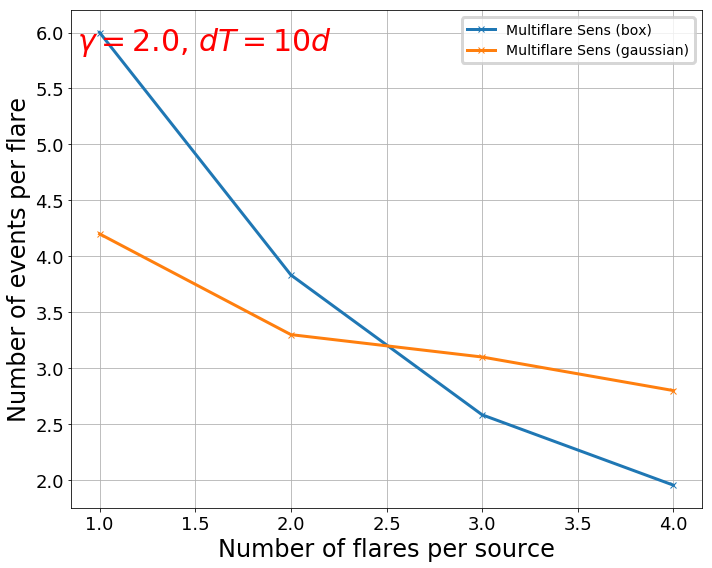

In [30]:
#sens plots
Nflares = [1,2,3,4]
sens_me = sf_sens
sens_fran = [4.2, 3.3, 3.1, 2.8]

plt.plot(Nflares, sens_me, 'x-', color='tab:blue', label='Multiflare Sens (box)')
plt.plot(Nflares, sens_fran, 'x-', color='tab:orange', label='Multiflare Sens (gaussian)')
plt.xlabel('Number of flares per source')
plt.ylabel('Number of events per flare')
plt.legend(loc=0)
plt.grid()
plt.annotate("$\gamma=2.0$, $dT=10d$", (0.01,0.92), xycoords='axes fraction', color='r', size='30')
#plt.ylim(0,30)